In [1]:
import sys
sys.path.append('./')

import numpy as np
import matplotlib.pyplot as plt
from gradient_descent import *

# Load data
data = np.loadtxt(
    './data/Student_Performance.csv',
    delimiter=',',
    skiprows=1,
    dtype=[
        ('Hours Studied', 'float'),
        ('Previous Scores', 'float'),
        ('Extracurricular Activities', 'U3'),
        ('Sleep Hours', 'float'),
        ('Sample Question Papers Practiced', 'float'),
        ('Performance Index', 'float'),
    ]
)

In [2]:
# Convert data for machine learning
def convert_data(raw_data):
    m = len(data)
    perf_idx = 5
    
    x_train = np.zeros((m, perf_idx))
    y_train = np.zeros(m)
    for i in range(m):
        entry = data[i]
        row = np.zeros(perf_idx)
        for j in range(perf_idx):
            val = entry[j]
            if val == 'Yes':
                val = 1
            elif val == 'No':
                val = 0
            row[j] = val
        x_train[i] = row
        y_train[i] = entry[perf_idx]
    return x_train, y_train
    
x_train, y_train = convert_data(data)

print(x_train[0:10])
print(y_train[0:10])

[[ 7. 99.  1.  9.  1.]
 [ 4. 82.  0.  4.  2.]
 [ 8. 51.  1.  7.  2.]
 [ 5. 52.  1.  5.  2.]
 [ 7. 75.  0.  8.  5.]
 [ 3. 78.  0.  9.  6.]
 [ 7. 73.  1.  5.  6.]
 [ 8. 45.  1.  4.  6.]
 [ 5. 77.  0.  8.  2.]
 [ 4. 89.  0.  4.  0.]]
[91. 65. 45. 36. 66. 61. 63. 42. 61. 69.]


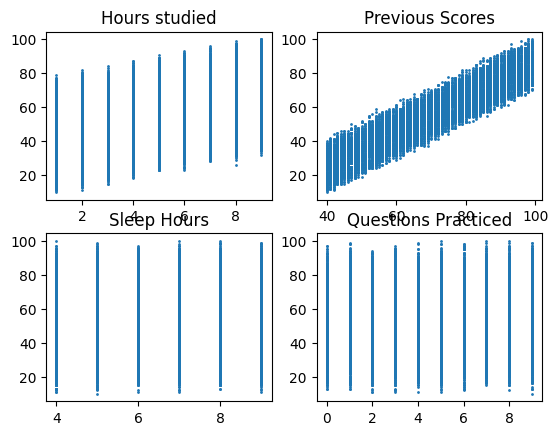

In [3]:
def visualize(X_train, y, y_comp = None):
    # X_train: training input
    # y: either prediction or target
    # y_comp: comparison set
    
    # Visualize data
    fig, axs = plt.subplots(2, 2)

    axs[0, 0].set_title('Hours studied')
    axs[0, 0].scatter(x_train[:, 0], y_train, s=1)
    if y_comp:
        axs[0, 0].scatter(x_train[:, 0], y_comp, s=1)
    
    axs[0, 1].set_title('Previous Scores')
    axs[0, 1].scatter(x_train[:, 1], y_train, s=1)
    if y_comp:
        axs[0, 1].scatter(x_train[:, 1], y_comp, s=1)
    
    axs[1, 0].set_title('Sleep Hours')
    axs[1, 0].scatter(x_train[:, 3], y_train, s=1)
    if y_comp:
        axs[1, 0].scatter(x_train[:, 3], y_comp, s=1)
    
    axs[1, 1].set_title('Questions Practiced')
    axs[1, 1].scatter(x_train[:, 4], y_train, s=1)
    if y_comp:
            axs[1, 1].scatter(x_train[:, 4], y_comp, s=1)
    
visualize(x_train, y_train)

In [4]:
# OPTIONAL: normalize data
mu = np.mean(x_train)
sigma = np.std(x_train)

x_norm = (x_train - mu)/sigma

In [5]:
# Define initial weights and biases
w = np.array(np.random.uniform(0, 20, size=5))
b = np.random.uniform(0, 20)

In [6]:
# Learning rate was chosen through experimenting with different values
# until it becomes too large (cost keeps rising)
learning_rate = 0.3
num_iter = 1000

cost_history, w_res, b_res = fit(x_norm, y_train, w, b, learning_rate, num_iter)

[0] 1113.005883780145
[200] 11.073029302553875
[400] 5.689587411484378
[600] 3.5991424484043777
[800] 2.7763519525261455
[1000] 2.4467383322201233


In [7]:
print(f'Weights and bias found: {w_res}, {b_res}, after, {len(cost_history)} iterations')

Weights and bias found: [71.15796302 28.0043672  -9.91833846 10.18231153  3.78082092], 33.186029237494594, after, 1001 iterations


Text(0, 0.5, 'Cost')

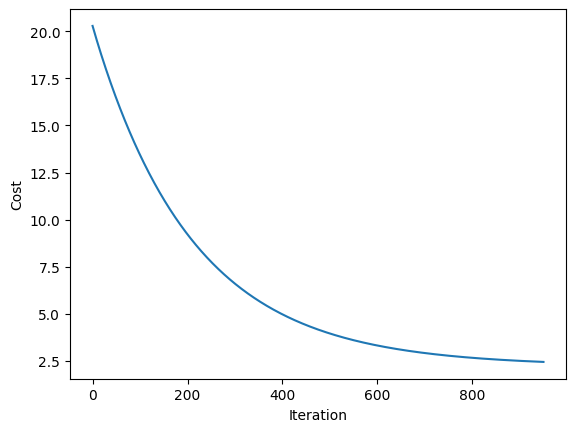

In [8]:
# visualize learning process
fig, ax = plt.subplots()
# discard the first 50 cost values since they drop very quickly
ax.plot(np.arange(len(cost_history[50:])), cost_history[50:])
ax.set_xlabel("Iteration")
ax.set_ylabel("Cost")

In [10]:
# test first few predictions

def test(X, y, w, b):
    m = X[:10].shape[0]
    for i in range(m):
        prediction = f(X[i], w, b)
        target = y[i]
        print('{:.2f}  {:.2f}, {:.2f}'.format(prediction, target, abs(prediction - target)))

test(x_norm, y_train, w_res, b_res)

90.88  91.00, 0.12
64.34  65.00, 0.66
43.79  45.00, 1.21
36.27  36.00, 0.27
66.88  66.00, 0.88
60.06  61.00, 0.94
63.49  63.00, 0.49
37.09  42.00, 4.91
63.31  61.00, 2.31
71.22  69.00, 2.22


Our model is able to predict the performance index quite close to the target values, with single digit errors so far.

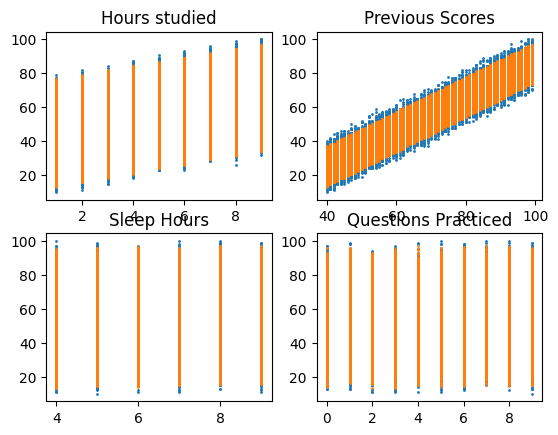

In [12]:
# Evaluate the model
m = x_train.shape[0]
y_predict = []
for i in range(m):
    y_predict.append(f(x_norm[i], w_res, b_res))

visualize(x_train, y_train, y_predict)

We can see that the orange areas overlap with most of the graph of the training data. This indicates that our model is able to predict quite well so far.

In [13]:
# Scikit-Learn implementation
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
skx_norm = scaler.fit_transform(x_train)

In [14]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(skx_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 7, number of weight updates: 70001.0


In [15]:
b_norm = sgdr.intercept_[0]
w_norm = sgdr.coef_
print(f"model parameters:                   w: {w_norm}, b:{b_norm}")


model parameters:                   w: [ 7.38434769 17.64993249  0.30411759  0.83651799  0.52704263], b:55.23212891717973


In [16]:
# test first few predictions
test(skx_norm, y_train, w_norm, b_norm)

91.90  91.00, 0.90
63.15  65.00, 1.85
45.10  45.00, 0.10
36.57  36.00, 0.57
67.11  66.00, 1.11
59.43  61.00, 1.57
64.39  63.00, 1.39
38.25  42.00, 3.75
62.89  61.00, 1.89
69.91  69.00, 0.91


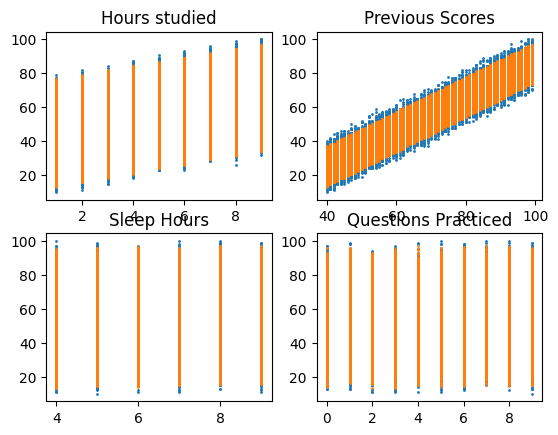

In [17]:
# Evaluate the model
m = x_train.shape[0]
y_predict_sgdr = []
for i in range(m):
    y_predict_sgdr.append(f(x_norm[i], w_res, b_res))

visualize(x_train, y_train, y_predict_sgdr)

In [18]:
print('Mean and SD of our implementation: {:.2f}  {:.2f}'.format(np.mean(y_predict), np.std(y_predict)))
print('Mean and SD of Scikit-Learn implementation: {:.2f}  {:.2f}'.format(np.mean(y_predict_sgdr), np.std(y_predict_sgdr)))

Mean and SD of our implementation: 55.20  18.91
Mean and SD of Scikit-Learn implementation: 55.20  18.91


Our model and Scikit-learn's model have the same mean and standard deviation. But Scikit-learn runs much faster (instant result vs. couple of minutes)